# Simple Linear Regression dengan Scikit-Learn

### **Sample Dataset**

In [1]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pizza ={'diameter':[6,8,10,14,18],
        'harga':[7,9,13,17.5,18]}
pizza_df=pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


### **Visualisasi Data**

<Figure size 600x400 with 0 Axes>

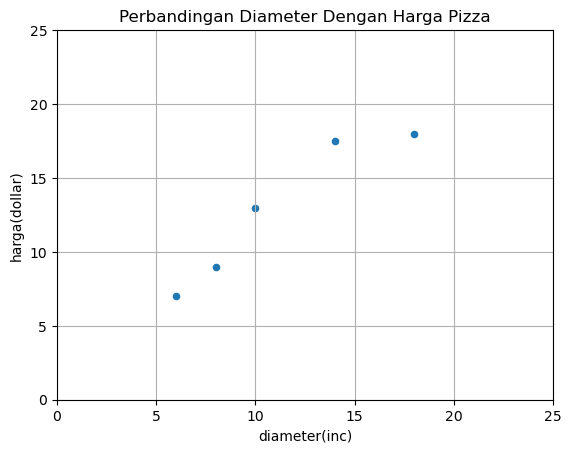

In [22]:
# Visualisasi data
plt.figure(figsize=(6,4))
pizza_df.plot(kind='scatter',x='diameter',y='harga')
plt.title('Perbandingan Diameter Dengan Harga Pizza')
plt.xlabel('diameter(inc)')
plt.ylabel('harga(dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [23]:
# mengubah tipe data menjadi array
x=np.array(pizza_df['diameter'])
y=np.array(pizza_df['harga'])

print(f'nilai :{x}')
print(f'nilai :{y}')

nilai :[ 6  8 10 14 18]
nilai :[ 7.   9.  13.  17.5 18. ]


In [24]:
# Mengubah data dari horizontal menjadi vertikal atau 2 dimensi
x=x.reshape(-1,1)
x.shape

(5, 1)

In [5]:
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

### **Training Simple Linear Regression Model**

In [25]:
# Membuat model regresi linear menggunakan nilai x dan y
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [26]:
# Melakukan skala gambar x sejau 25 poin/grid
x_vis=np.array([0,25]).reshape(-1,1)
y_vis=model.predict(x_vis)

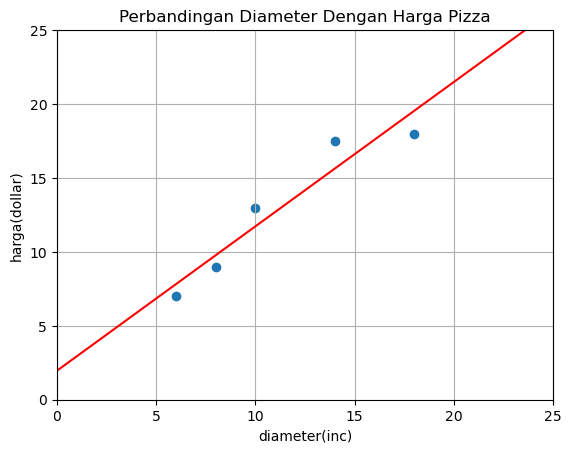

In [27]:
# melakuakan visualisasi garis regresi atau slope.
plt.scatter(x,y)
plt.plot(x_vis,y_vis,'-r')

plt.title('Perbandingan Diameter Dengan Harga Pizza')
plt.xlabel('diameter(inc)')
plt.ylabel('harga(dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

#### Formula Simple Linear Regression:**Y=a+bx**
- Y adalah respons variable atau variable target\hasil
- a adalah interceptor
- b adalah slope
- x adalah explanatory variable\nilai variabel x\feature variable

In [28]:
# menampilkan nilai intercept dan slope
print(f'intercept:{model.intercept_}')
print(f'slope:{model.coef_}')

intercept:1.965517241379315
slope:[0.9762931]


#### Mencari Nilai Slope
nilai slope pada linear regression dapat menggunakan formula berikut:
> b = cov(x,y) / var(x)

In [29]:
# menampilkan nilai x, x secara horizontal, dan y
print(f'x:\n{x}\n')
print(f'x flatten:{x.flatten()}\n')
print(f'y:{y}')

x:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

x flatten:[ 6  8 10 14 18]

y:[ 7.   9.  13.  17.5 18. ]


#### Variance 

In [30]:
# Mencari nilai variance
variance_x=np.var(x.flatten(), ddof=1)
print(f'variance:{variance_x}')

variance:23.2


#### Covariance

In [31]:
# Mencari nilai covariance
np.cov(x.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [13]:
covariance_xy=np.cov(x.flatten(), y)[0][1]
print(f'covariance:{covariance_xy}')

covariance:22.65


#### Slope

In [32]:
# mencari nilai slope
slope=covariance_xy/variance_x
print(f'slope:{slope}')

slope:0.9762931034482758


#### Mencari Nilai Intercept

In [33]:
# Mencari nilai intercept
intercept = np.mean(y)-slope*np.mean(x)
print(f'intercept: {intercept}')

intercept: 1.9655172413793114


### **Melakukan Prediksi Harga Pizza**

In [35]:
# membuat variable feature atau x baru
diamter_pizza=np.array([12,20,23]).reshape(-1,1)
diamter_pizza

array([[12],
       [20],
       [23]])

In [36]:
# Melakukan prediksi harga pizza berdasarkan nilai x baru
prediksi_harga=model.predict(diamter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [37]:
# menampilkan diameter\x baru dengan harga prediksi pizza menggunakan looping dan zip.
for dmtr,hrg in zip(diamter_pizza,prediksi_harga):
    print(f'diamter: {dmtr},prediksi harga: {hrg}')

diamter: [12],prediksi harga: 13.681034482758621
diamter: [20],prediksi harga: 21.491379310344826
diamter: [23],prediksi harga: 24.42025862068965


### **Evaluasi Simple Linear Regretion Model**

In [38]:
# Melakukan splitting data untuk evaluasi model linear regression
x_train =np.array([6,8,10,14,18]).reshape(-1,1)
y_train =np.array([7,9,13,17.5,18])

x_test =np.array([8,9,11,16,12]).reshape(-1,1)
y_test =np.array([11,8.5,15,18,11])

#### Training Simple Linear Regression

In [39]:
# membuat model linear regretion baru
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### **Evaluasi Simple Linear Regretion Model Menggunakan Coefficient of Determination (R^2)**

In [40]:
# mengevaluasi menggunakan r^2
from sklearn.metrics import r2_score
y_pred=model.predict(x_test)
y_square=r2_score(y_test,y_pred)

print(f'r2_square:{y_square}')

r2_square:0.6620052929422553


nilai r2_square yang diatas 0 yaitu 0.6620052929422553 yang dapat diartikan model lineae regresionnya baik\fit\akurat.